In [249]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import pandas as pd
import numpy as np
import os

plt.rcParams['figure.dpi'] = 300

In [231]:
# Get correlations
CORRELATIONS = pd.read_csv("../output/05_correlations_toremove.tsv", sep='\t')

# Get model names
CORRELATIONS['FullModelName1'] = ["-".join((i,j,k)) for i,j,k in zip(CORRELATIONS['Pathogen1'], CORRELATIONS['Task1'], CORRELATIONS['Model1'])]
CORRELATIONS['FullModelName2'] = ["-".join((i,j,k)) for i,j,k in zip(CORRELATIONS['Pathogen2'], CORRELATIONS['Task2'], CORRELATIONS['Model2'])]

# Get all models
ALL_MODELS = set(CORRELATIONS['FullModelName1']).union(CORRELATIONS['FullModelName1'])

# Get correlations
name_to_spearman = {(i,j): [k,l] for i,j,k,l in zip(CORRELATIONS['FullModelName1'], CORRELATIONS['FullModelName2'], 
                                            CORRELATIONS['Spearman statistic'], CORRELATIONS['Spearman pvalue'])}

# Define some paths
PATH_TO_PREDICTIONS = os.path.join("..", "output", "04_predictions_drugbank_toremove")

In [196]:
# # Set correlation matrix to build
# labels = [i for i in sorted(ALL_MODELS) if i.split("-")[2] == 'NB']

# # Get model inds
# name_to_ind = {name: c for c, name in enumerate(sorted(labels))}

# # Build matrix
# X = np.zeros((len(labels), len(labels)))

# # Fill the matrix
# for lab1 in labels:
#     for lab2 in labels:
#         t = tuple(sorted((lab1, lab2)))
#         X[name_to_ind[lab1]][name_to_ind[lab2]] = name_to_spearman[t][0]

# plt.imshow(X, vmin=0.5, vmax=1)
# cbar = plt.colorbar()
# cbar.set_label('Spearman correlation', labelpad=11)
# plt.show()

In [201]:
# Focus on NB correlations exclusively
CORRELATIONS = CORRELATIONS[(CORRELATIONS['Model1'] == 'NB') & (CORRELATIONS['Model2'] == 'NB') & (CORRELATIONS['Same task'] == False)].reset_index(drop=True)

# Get correlations inter & intra
CORRELATIONS_INTER = np.array(CORRELATIONS[CORRELATIONS['Same pathogen'] == False].reset_index(drop=True)['Spearman statistic'].tolist())
CORRELATIONS_INTRA = np.array(CORRELATIONS[CORRELATIONS['Same pathogen'] == True].reset_index(drop=True)['Spearman statistic'].tolist())

# Select cutoffs
thrs = np.linspace(-1, 1, 100)

# Get cumulative values
cumulative_inter = []
cumulative_intra = []

for thr in thrs:

    # Get cumulative proportions
    cumulative_inter.append(len(np.where(CORRELATIONS_INTER <= thr)[0]) / len(CORRELATIONS_INTER))
    cumulative_intra.append(len(np.where(CORRELATIONS_INTRA <= thr)[0]) / len(CORRELATIONS_INTRA))

In [207]:
# Number of tasks
len(set(CORRELATIONS['FullModelName1'].tolist() + CORRELATIONS['FullModelName2'].tolist()))

468

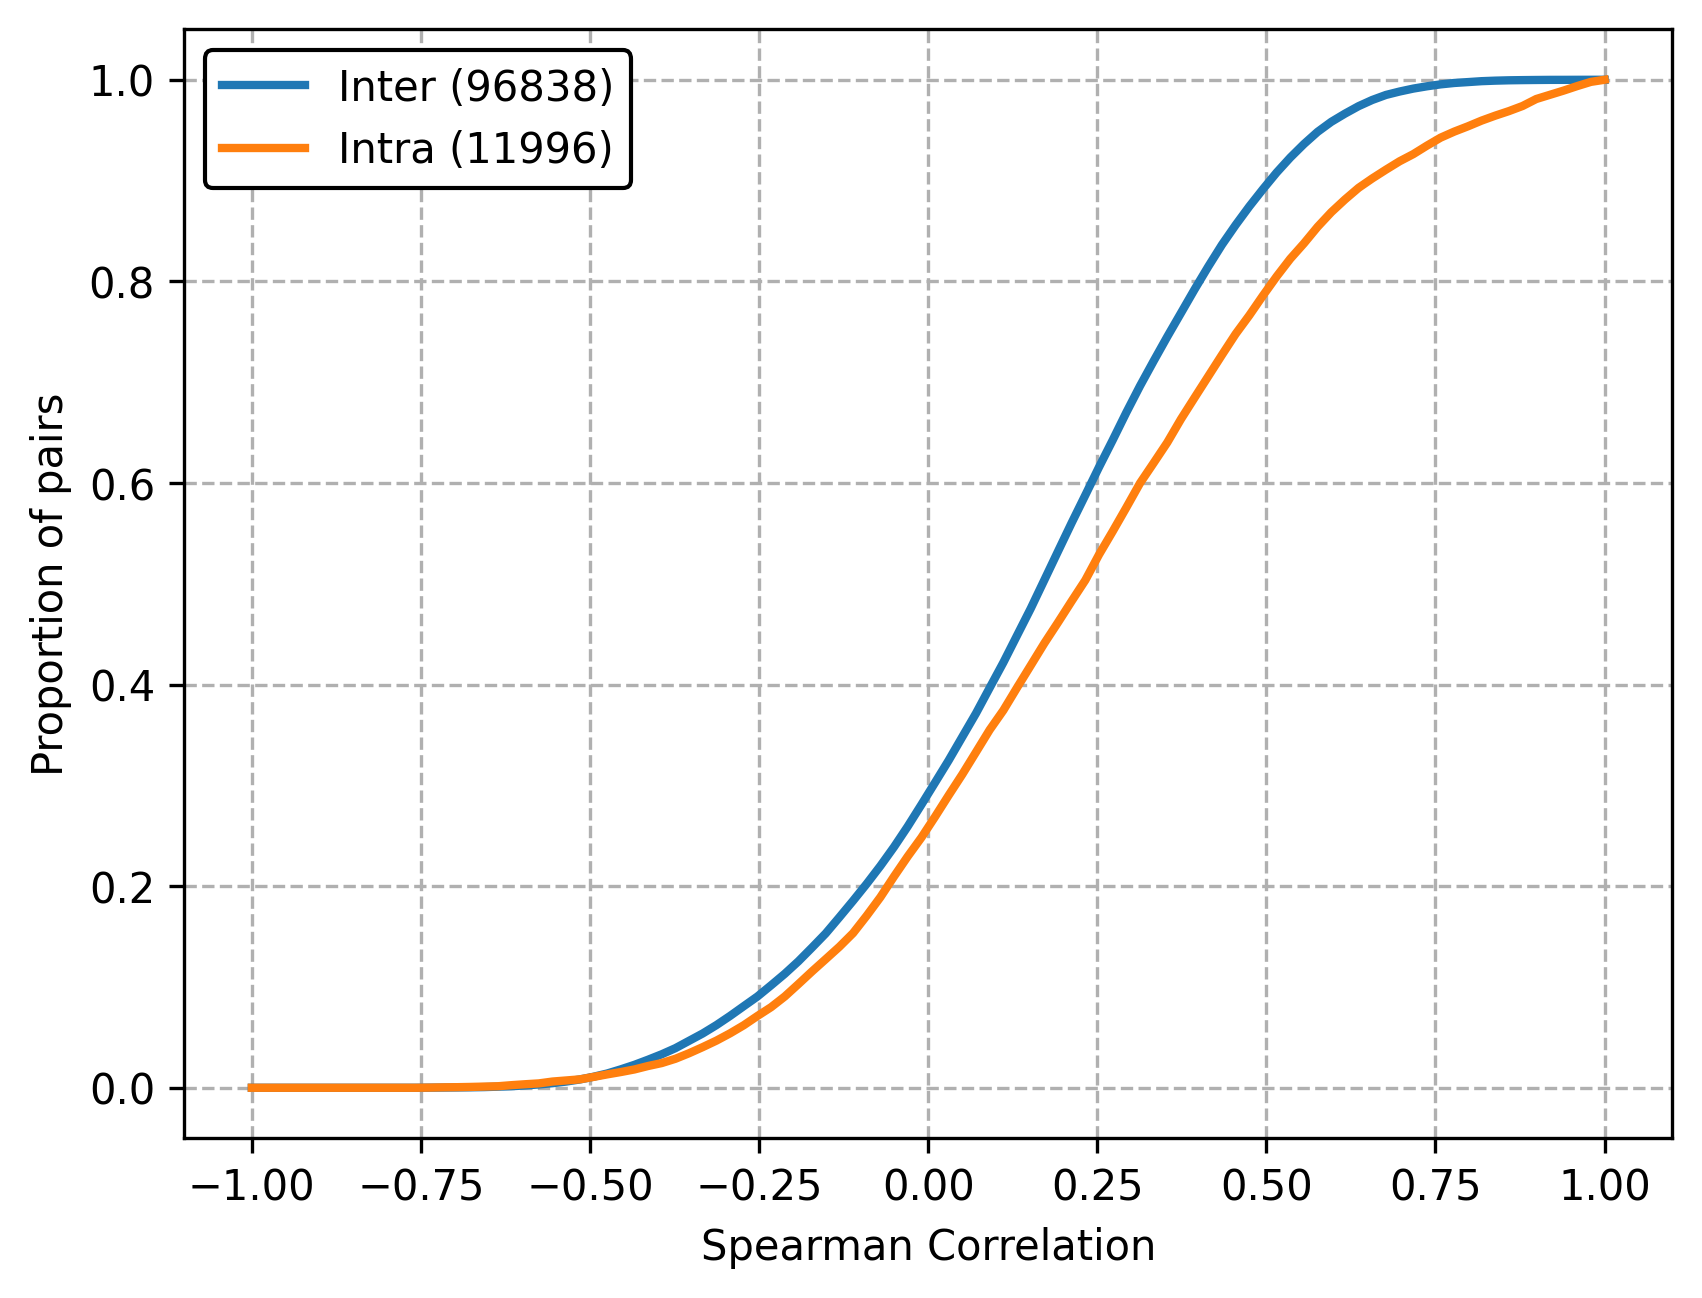

In [202]:
plt.plot(thrs, cumulative_inter, label=f'Inter ({len(CORRELATIONS_INTER)})', zorder=3, lw=2)
plt.plot(thrs, cumulative_intra, label=f'Intra ({len(CORRELATIONS_INTRA)})', zorder=3, lw=2)

plt.ylabel("Proportion of pairs")
plt.xlabel("Spearman Correlation")
plt.legend(loc='best', framealpha=1, edgecolor="k")
plt.grid(linestyle='--', zorder=2)
plt.show()

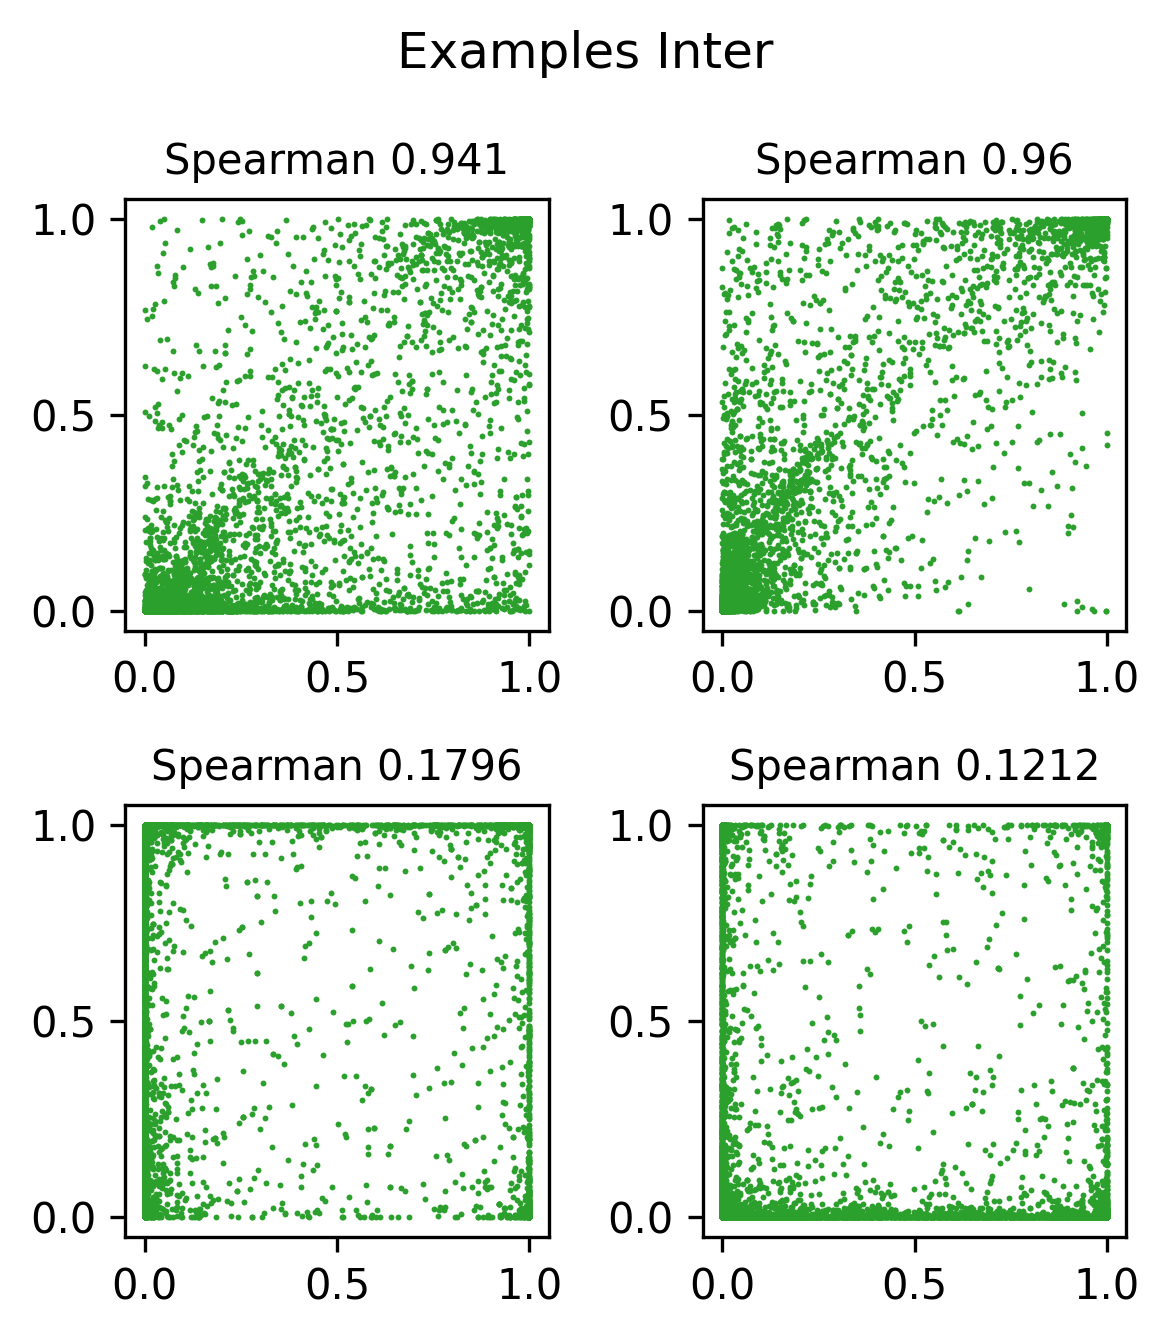

In [274]:
# Inter
inter_sample_high = CORRELATIONS[(CORRELATIONS['Same pathogen'] == False) & (CORRELATIONS['Spearman statistic'] > 0.9)].sample(n=2, random_state=42).reset_index(drop=True)
inter_sample_low = CORRELATIONS[(CORRELATIONS['Same pathogen'] == False) & (CORRELATIONS['Spearman statistic'] < 0.2)].sample(n=2, random_state=42).reset_index(drop=True)

fig, ax = plt.subplots(2, 2, figsize=(4, 4.5))

for c1, inter in enumerate([inter_sample_high, inter_sample_low]):
    for c2, (name1, name2) in enumerate(zip(inter['FullModelName1'], inter['FullModelName2'])):
        # Load predictions
        preds1 = np.load(os.path.join(PATH_TO_PREDICTIONS, name1.split("-")[0], name1.split("-")[1], "NB.npy"))
        preds2 = np.load(os.path.join(PATH_TO_PREDICTIONS, name2.split("-")[0], name2.split("-")[1], "NB.npy"))
        ax[c1][c2].scatter(preds1, preds2, c='tab:green', s=2, lw=0)
        ax[c1][c2].set_title(f"Spearman {round(spearmanr(preds1, preds2).statistic, 4)}", size=10)
        ax[c1][c2].set_xticks([0, 0.5, 1])
        ax[c1][c2].set_yticks([0, 0.5, 1])

plt.suptitle("Examples Inter")
plt.tight_layout()
plt.show()

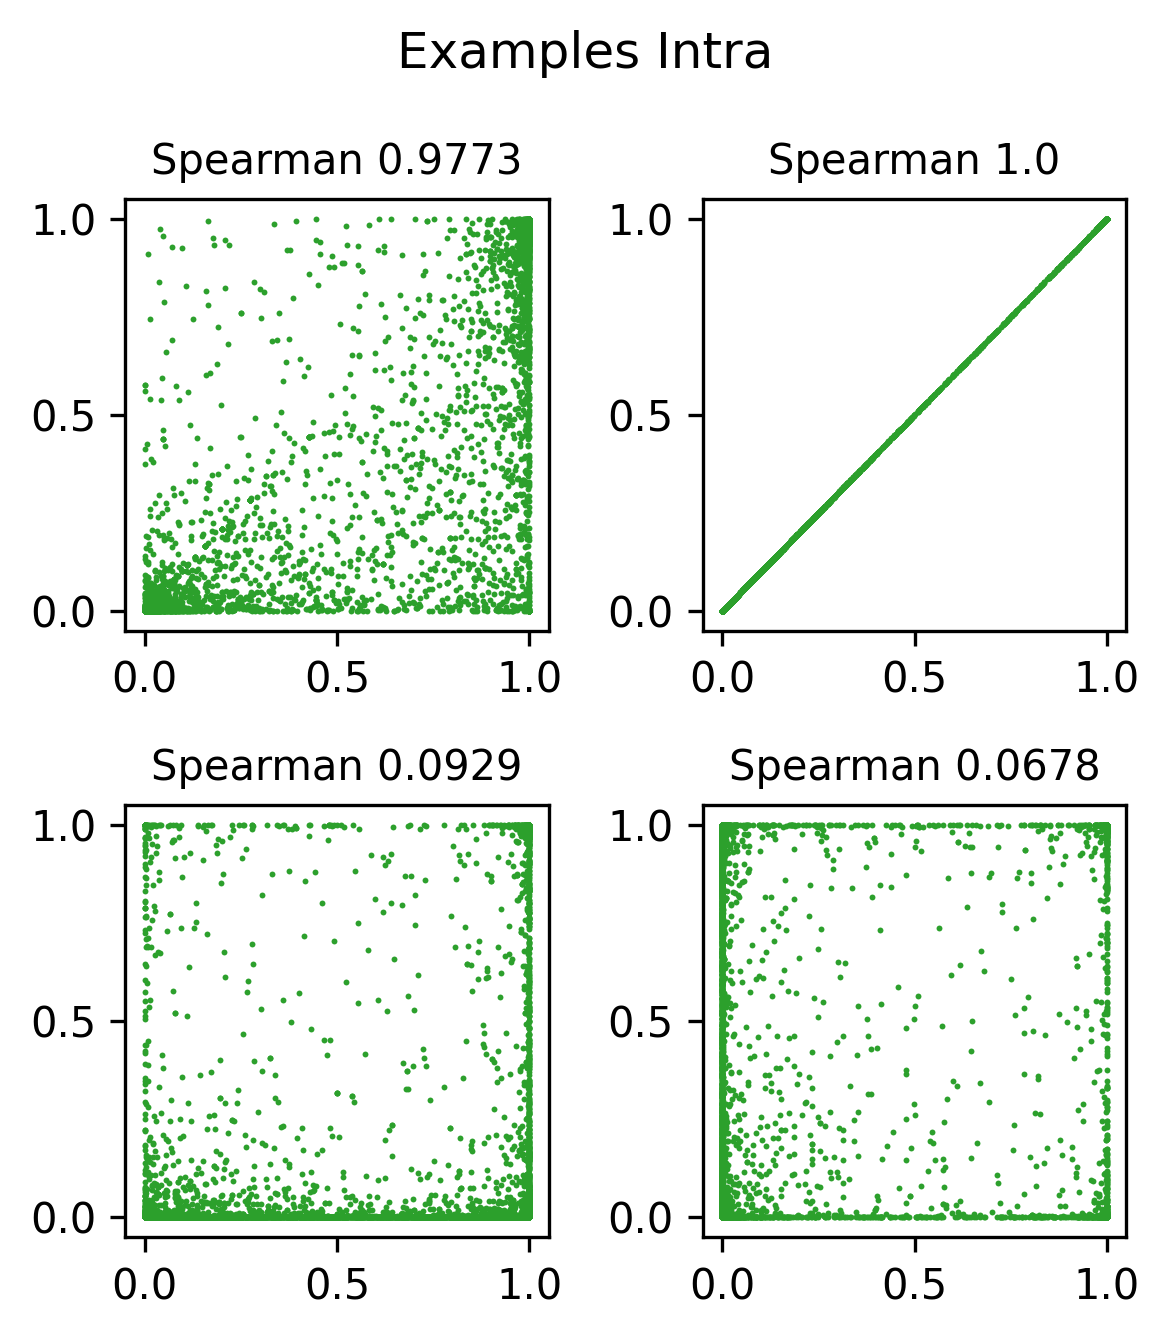

In [275]:
# Intra
intra_sample_high = CORRELATIONS[(CORRELATIONS['Same pathogen'] == True) & (CORRELATIONS['Spearman statistic'] > 0.9)].sample(n=2, random_state=42).reset_index(drop=True)
intra_sample_low = CORRELATIONS[(CORRELATIONS['Same pathogen'] == True) & (CORRELATIONS['Spearman statistic'] < 0.2)].sample(n=2, random_state=42).reset_index(drop=True)

fig, ax = plt.subplots(2, 2, figsize=(4, 4.5))

for c1, intra in enumerate([intra_sample_high, intra_sample_low]):
    for c2, (name1, name2) in enumerate(zip(intra['FullModelName1'], intra['FullModelName2'])):
        # Load predictions
        preds1 = np.load(os.path.join(PATH_TO_PREDICTIONS, name1.split("-")[0], name1.split("-")[1], "NB.npy"))
        preds2 = np.load(os.path.join(PATH_TO_PREDICTIONS, name2.split("-")[0], name2.split("-")[1], "NB.npy"))
        ax[c1][c2].scatter(preds1, preds2, c='tab:green', s=2, lw=0)
        ax[c1][c2].set_title(f"Spearman {round(spearmanr(preds1, preds2).statistic, 4)}", size=10)
        ax[c1][c2].set_xticks([0, 0.5, 1])
        ax[c1][c2].set_yticks([0, 0.5, 1])

plt.suptitle("Examples Intra")
plt.tight_layout()
plt.show()